In [3]:
Step 1 - Create a Small SQLite Database(Sales_data 

import sqlite3



In [7]:
#create Database

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

In [9]:
# Create table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT,
    quantity INTEGER,
    price REAL
);
""")

In [11]:
# Add sample data

sample_data = [
    ("Laptop", 5, 700),
    ("Mouse", 20, 15),
    ("Keyboard", 10, 30),
    ("Monitor", 3, 150),
    ("Laptop", 2, 700),
    ("Mouse", 5, 15),
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

conn.commit()
conn.close()

print("Database created successfully!")

#this creates sales_data.db with a single table sales(product,quantity,price)

Database created successfully!


In [13]:
#Step 2 - Connect to AQLite & Run SQL Queries

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("sales_data.db")

In [15]:
#Step 3 - Run SQL Query to Get tital Quantity & Revenue

query = """
SELECT 
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""

df = pd.read_sql_query(query, conn)
df

,product,total_qty,revenue
0,Keyboard,10,300.0
1,Laptop,7,4900.0
2,Monitor,3,450.0
3,Mouse,25,375.0


In [17]:
#Step 4 Print Results 

print("Sales Summary:")
print(df)

Sales Summary:
    product  total_qty  revenue
0  Keyboard         10    300.0
1    Laptop          7   4900.0
2   Monitor          3    450.0
3     Mouse         25    375.0


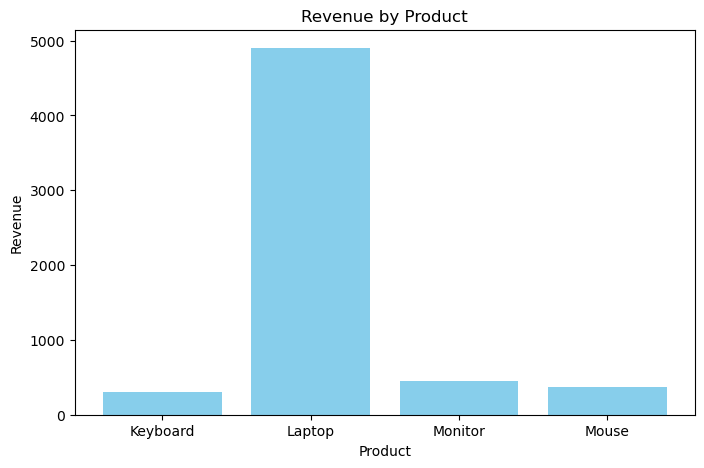

In [19]:
#Step 5 - Creating Simple Bar Chart(Revenue by Product)

plt.figure(figsize=(8,5))
plt.bar(df['product'], df['revenue'], color='skyblue')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.show()

In [21]:
#To save Chart: 

plt.savefig("sales_chart.png")

<Figure size 640x480 with 0 Axes>